### 7. Feladatsor

Konzisztencia rend, stabilitás 2.

#### Dahlquist-féle tesztegyenlet

$$
\begin{align}
     \dot x = \lambda x
\end{align}
$$

ahol $\lambda \in \mathbb{C}$ paraméter. 


Megoldása: 

$$x(t) = c\cdot e^{\lambda t} = c\cdot e^{(a+bi)t} = c\cdot e^{a t} e^{ibt}.$$

Ennek hossza
$$ |x(t)| = |c| \cdot e^{at},$$

mely függvény monotonicitását $a$ előjele dönti el.

#### 1. Feladat

Tekintsük a feladatot a $[0,1]$ intervallumon $\lambda = 1$ paraméter, $x(0) = 1$ kezdetiérték mellett.

a) Oldjuk meg az alábbi módszerrel

$$
\begin{cases}
k_1 &= f(t_n, y_n) \\
k_2 &= f(t_n + \frac{1}{2} h_n, y_n + h_n \frac{1}{2} k_1) \\
\\
y_{n+1} &= y_n + h_n k_2
\end{cases}
$$


és $h = 10^{-k}$ lépéshosszokkal $(k=2, \ldots, 5)$.

In [1]:
function [ts, ys] = rk2(f, ts, y0)
    ys = zeros(numel(y0), numel(ts));
    ys(:, 1) = y0;
    
    for n=1:(numel(ts) - 1)
        h = ts(n+1) - ts(n);
        
        k1 = f(ts(n), ys(:, n));
        k2 = f(ts(n) + h/2, ys(:, n) + h/2*k1);

        ys(:, n+1) = ys(:, n) + h * k2;
    end
end

In [2]:
h = 1e-1;
[ts, ys] = rk2(@(t, x)(x), 0:h:1, 1);

b) Megoldásainkat hasonlítsuk össsze a pontos megoldással, a végeredmény legyen a hibavektorok (valamilyen normában mért) hossza.

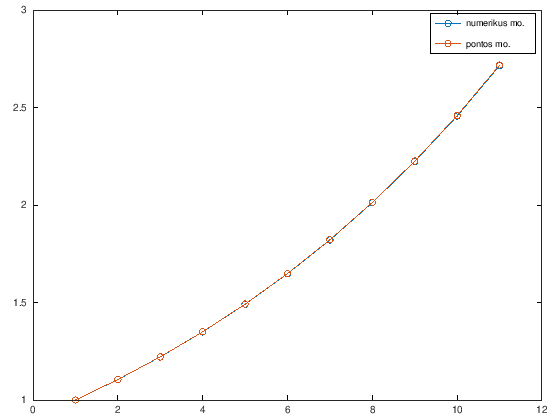

In [3]:
plot(ys, 'o-'); hold on
plot(exp(ts), '-o')

legend('numerikus mo.', 'pontos mo.')

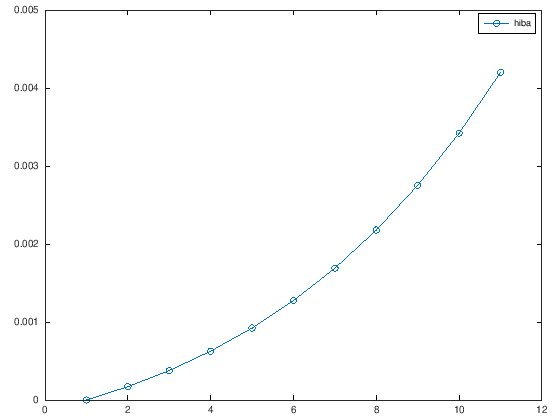

In [4]:
err = abs(ys - exp(ts));

plot(err, 'o-')
legend('hiba')

In [5]:
h = 10^(-1);
[ts, ys] = rk2(@(t, x)(x), 0:h:1, 1);

err = abs(ys - exp(ts));
max(abs(err))

ans =  0.0042010


In [6]:
h = 10^(-2);
[ts, ys] = rk2(@(t, x)(x), 0:h:1, 1);

err = abs(ys - exp(ts));
max(abs(err))

ans =  0.000044966


In [7]:
function errs = measure_errors(hs, method)
    errs = zeros(1, numel(hs));
    
    for k=1:numel(hs)
        h = hs(k);
        [ts, ys] = method(@(t, x)(x), 0:h:1, 1);

        err = abs(ys - exp(ts));
        errs(k) = max(abs(err));
    end
end

In [8]:
hs = .1.^(1:4)
errs = measure_errors(hs, @rk2)

hs =

   0.10000000   0.01000000   0.00100000   0.00010000

errs =

   0.0042009818508   0.0000449658991   0.0000004527073   0.0000000045302



c) Az így kapott hibákat ábrázoljuk egy log-log ábrán.

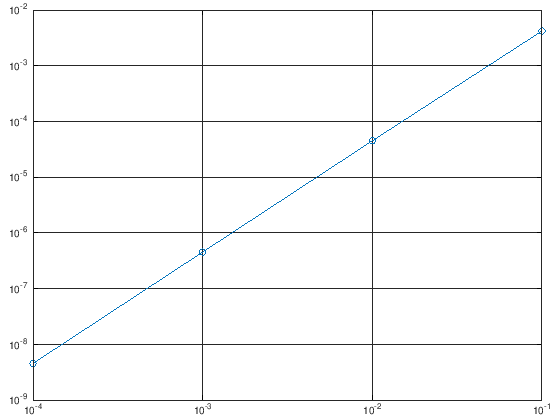

In [9]:
loglog(hs, errs, 'o-')
xlim([min(hs) max(hs)+eps])
grid on

d) Hogy tudnánk a kapott adatokra egyenest illeszteni? Ránézésre mi lenne ennek a meredeksége?

In [10]:
xs = 1:10;

polyfit(1:10, xs.^2 + 2*xs + 3, 2)

ans =

   1.0000   2.0000   3.0000



In [11]:
poly_coeffs = polyfit(log(hs), log(errs), 1)
exp(polyval(poly_coeffs, log(hs)))

poly_coeffs =

   1.98988  -0.87098

ans =

   0.0042840851950   0.0000438510569   0.0000004488508   0.0000000045943



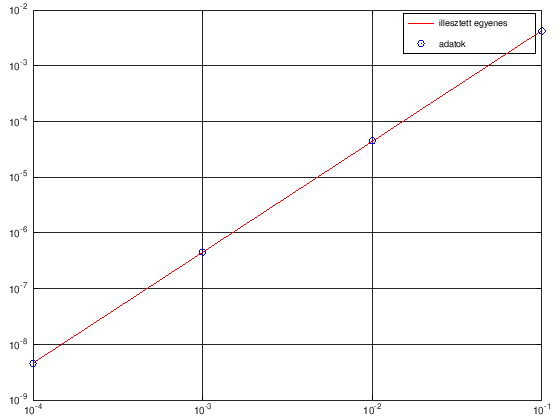

In [12]:
loglog(hs, exp(polyval(poly_coeffs, log(hs))), 'r-'); hold on;
loglog(hs, errs, 'bo');
legend("illesztett egyenes", "adatok")
xlim([min(hs) max(hs)+eps])
grid on

#### 2. Feladat

Vezessük le a módszer $R$ stabilitási függvényét, majd ábrázoljuk a stabilitási tartományát a `contourf` függvény segítségével!

$$
\begin{cases}
k_1 &= \lambda y_n \\
k_2 &= \lambda(y_n + h \frac{1}{2} \lambda y_n) \\
\\
y_{n+1} &= y_n + h \lambda(y_n + h \frac{1}{2} \lambda y_n)
\end{cases}
$$

$$\begin{align*}y_{n+1} &= \left(1 + z(1 + \frac12 z)\right) y_n \\
   R(z) &= 1 + z + \frac12 z^2
   \end{align*}$$

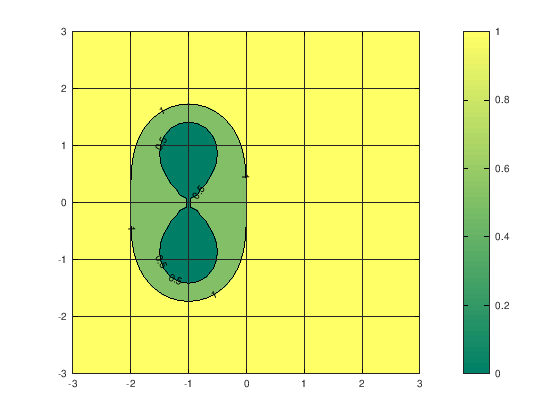

In [13]:
[X, Y] = meshgrid(linspace(-3, 3, 40), linspace(-3, 3, 40));
Z = X + 1i*Y;

contourf(X, Y, abs(1 + Z + .5*Z.^2), [0, .5, 1], 'ShowText','on')
colorbar
grid on
colormap summer

z = -3


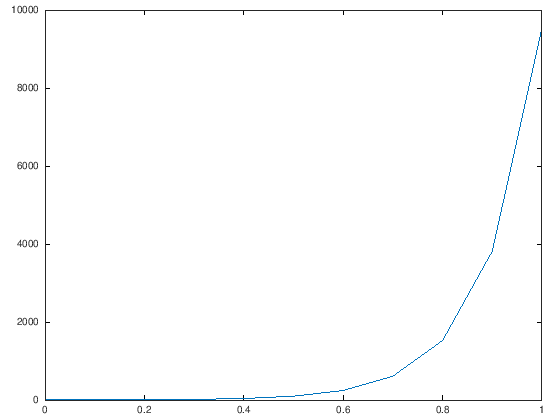

In [14]:
h = 10^(-1);
lam = -30;
z = lam*h
[ts, ys] = rk2(@(t, x)(lam*x), 0:h:1, 1);
plot(ts, ys)

z = -0.30000


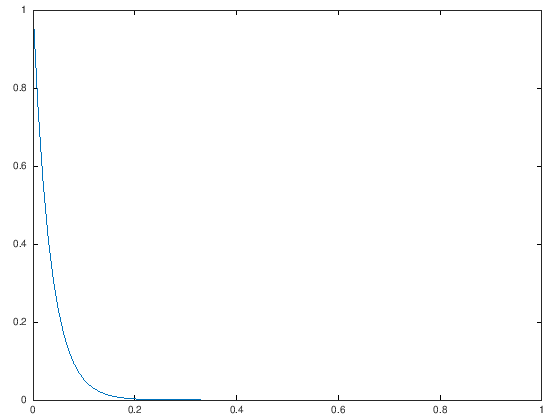

In [15]:
h = 10^(-2);
lam = -30;
z=h*lam
[ts, ys] = rk2(@(t, x)(lam*x), 0:h:1, 1);
plot(ts, ys)

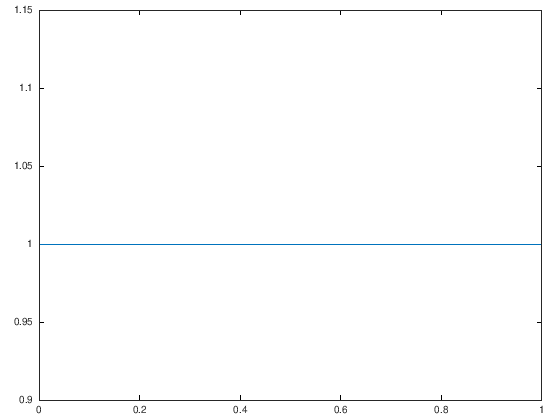

In [16]:
h = 10^(-1);
[ts, ys] = rk2(@(t, x)(-20*x), 0:h:1, 1);
plot(ts, ys)

#### 3. feladat

Tekintsük a két dimenziós lineáris autonóm egyenletek esetét:
$$
    \dot x = Ax,
$$
ahol $A \in \mathbb{R^{2\times 2}}$-es mátrix. Világos, hogy a $0$ egyensúlyi pont, hiszen $A0 = 0$.

a) Adott $A$ mátrix esetén ábrázoljuk az egyenlet fázisképét a $0$ körül, illetve néhány numerikus megoldás trajektóriáját is.

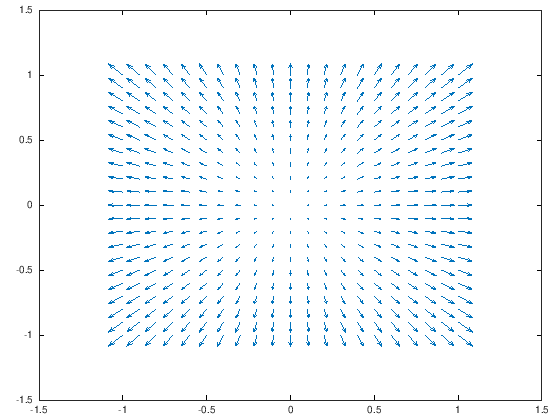

In [17]:
[X, Y] = meshgrid(-1:.1:1, -1:.1:1);
quiver(X, Y, X, Y)

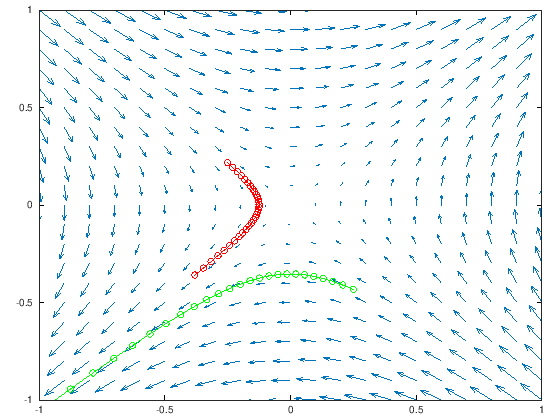

In [18]:
[X, Y] = meshgrid(-1:.1:1, -1:.1:1);

A = [0 1; 1 0];
%A = [0 1; -1 0];

UV=(A * [X(:)'; Y(:)']);
U = reshape(UV(1, :),size(X));
V = reshape(UV(2, :), size(Y));
quiver(X, Y, U, V)
xlim([-1, 1])
ylim([-1, 1])
hold on;

h = 1e-1;
[ts, ys] = rk2(@(t, x)(A*x), 0:h:(pi), .5*[-.5; .5*sqrt(3)/2]);
plot(ys(1, :), ys(2, :), 'o-r')

hold on;

[ts, ys] = rk2(@(t, x)(A*x), 0:h:(pi), .5*[.5; -sqrt(3)/2]);
plot(ys(1, :), ys(2, :), 'o-g')

b) Idézzük fel a $\operatorname{tr}-\det$ [diagrammot](https://ocw.mit.edu/courses/mathematics/18-03sc-differential-equations-fall-2011/unit-iv-first-order-systems/qualitative-behavior-phase-portraits/MIT18_03SCF11_s34_5text.pdf). Próbálgassunk végig néhány nevezetes esetet.

#### 4. feladat
Tekintsük a "a Runge-Kutta" módszert:

\begin{cases}
k_1 &= f(t_n, y_n) \\
k_2 &= f(t_n + \frac{1}{2} h_n, y_n + h_n \frac{1}{2} k_1) \\
k_3 &= f(t_n + \frac{1}{2} h_n, y_n + h_n \frac{1}{2} k_2) \\
k_4 &= f(t_n + h_n, y_n + h_n k_3) \\
\\
y_{n+1} &= y_n + h_n \frac{1}{6} \left( k_1 + 2k_2 + 2k_3 + k_4\right).
\end{cases}

a) A lineáris tesztegyenlet segítségével becsüljük meg a módszer rendjét. Méréseinkről készítsünk log-log ábrát.

b) Ábrázoljuk a stabilitási tartományát, majd ez alapján válasszunk alkalmas maximális megengedett lépéshosszt az
$$
    \dot x = (-4+4i) x
$$
egyenlethez (az optimális felső korlát megtalálása szorgalmi). Oldjuk is meg az egyenletet szimpatikus kezdetiértékkel. Megoldásunkat ábrázoljuk.